In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv(r"C:\Users\ikeol\OneDrive\Documents\10Alytics\Python\diabetes_prediction_dataset.csv")

In [5]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

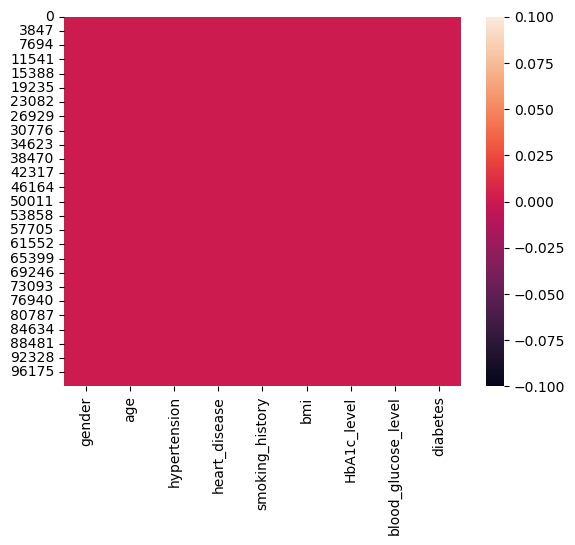

In [13]:
sns.heatmap(data.isnull())

##### Narration
The heatmap above shows that there are no null values in the dataset

In [15]:
data.duplicated().sum()

3854

In [17]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().sum()

0

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [23]:
numerical_data = data.select_dtypes(include="number")
numerical_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [25]:
numerical_columns = numerical_data.columns
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [27]:
categorical_data = data.select_dtypes(include="object")
categorical_columns = categorical_data.columns
categorical_columns

Index(['gender', 'smoking_history'], dtype='object')

In [29]:
len(numerical_columns)

7

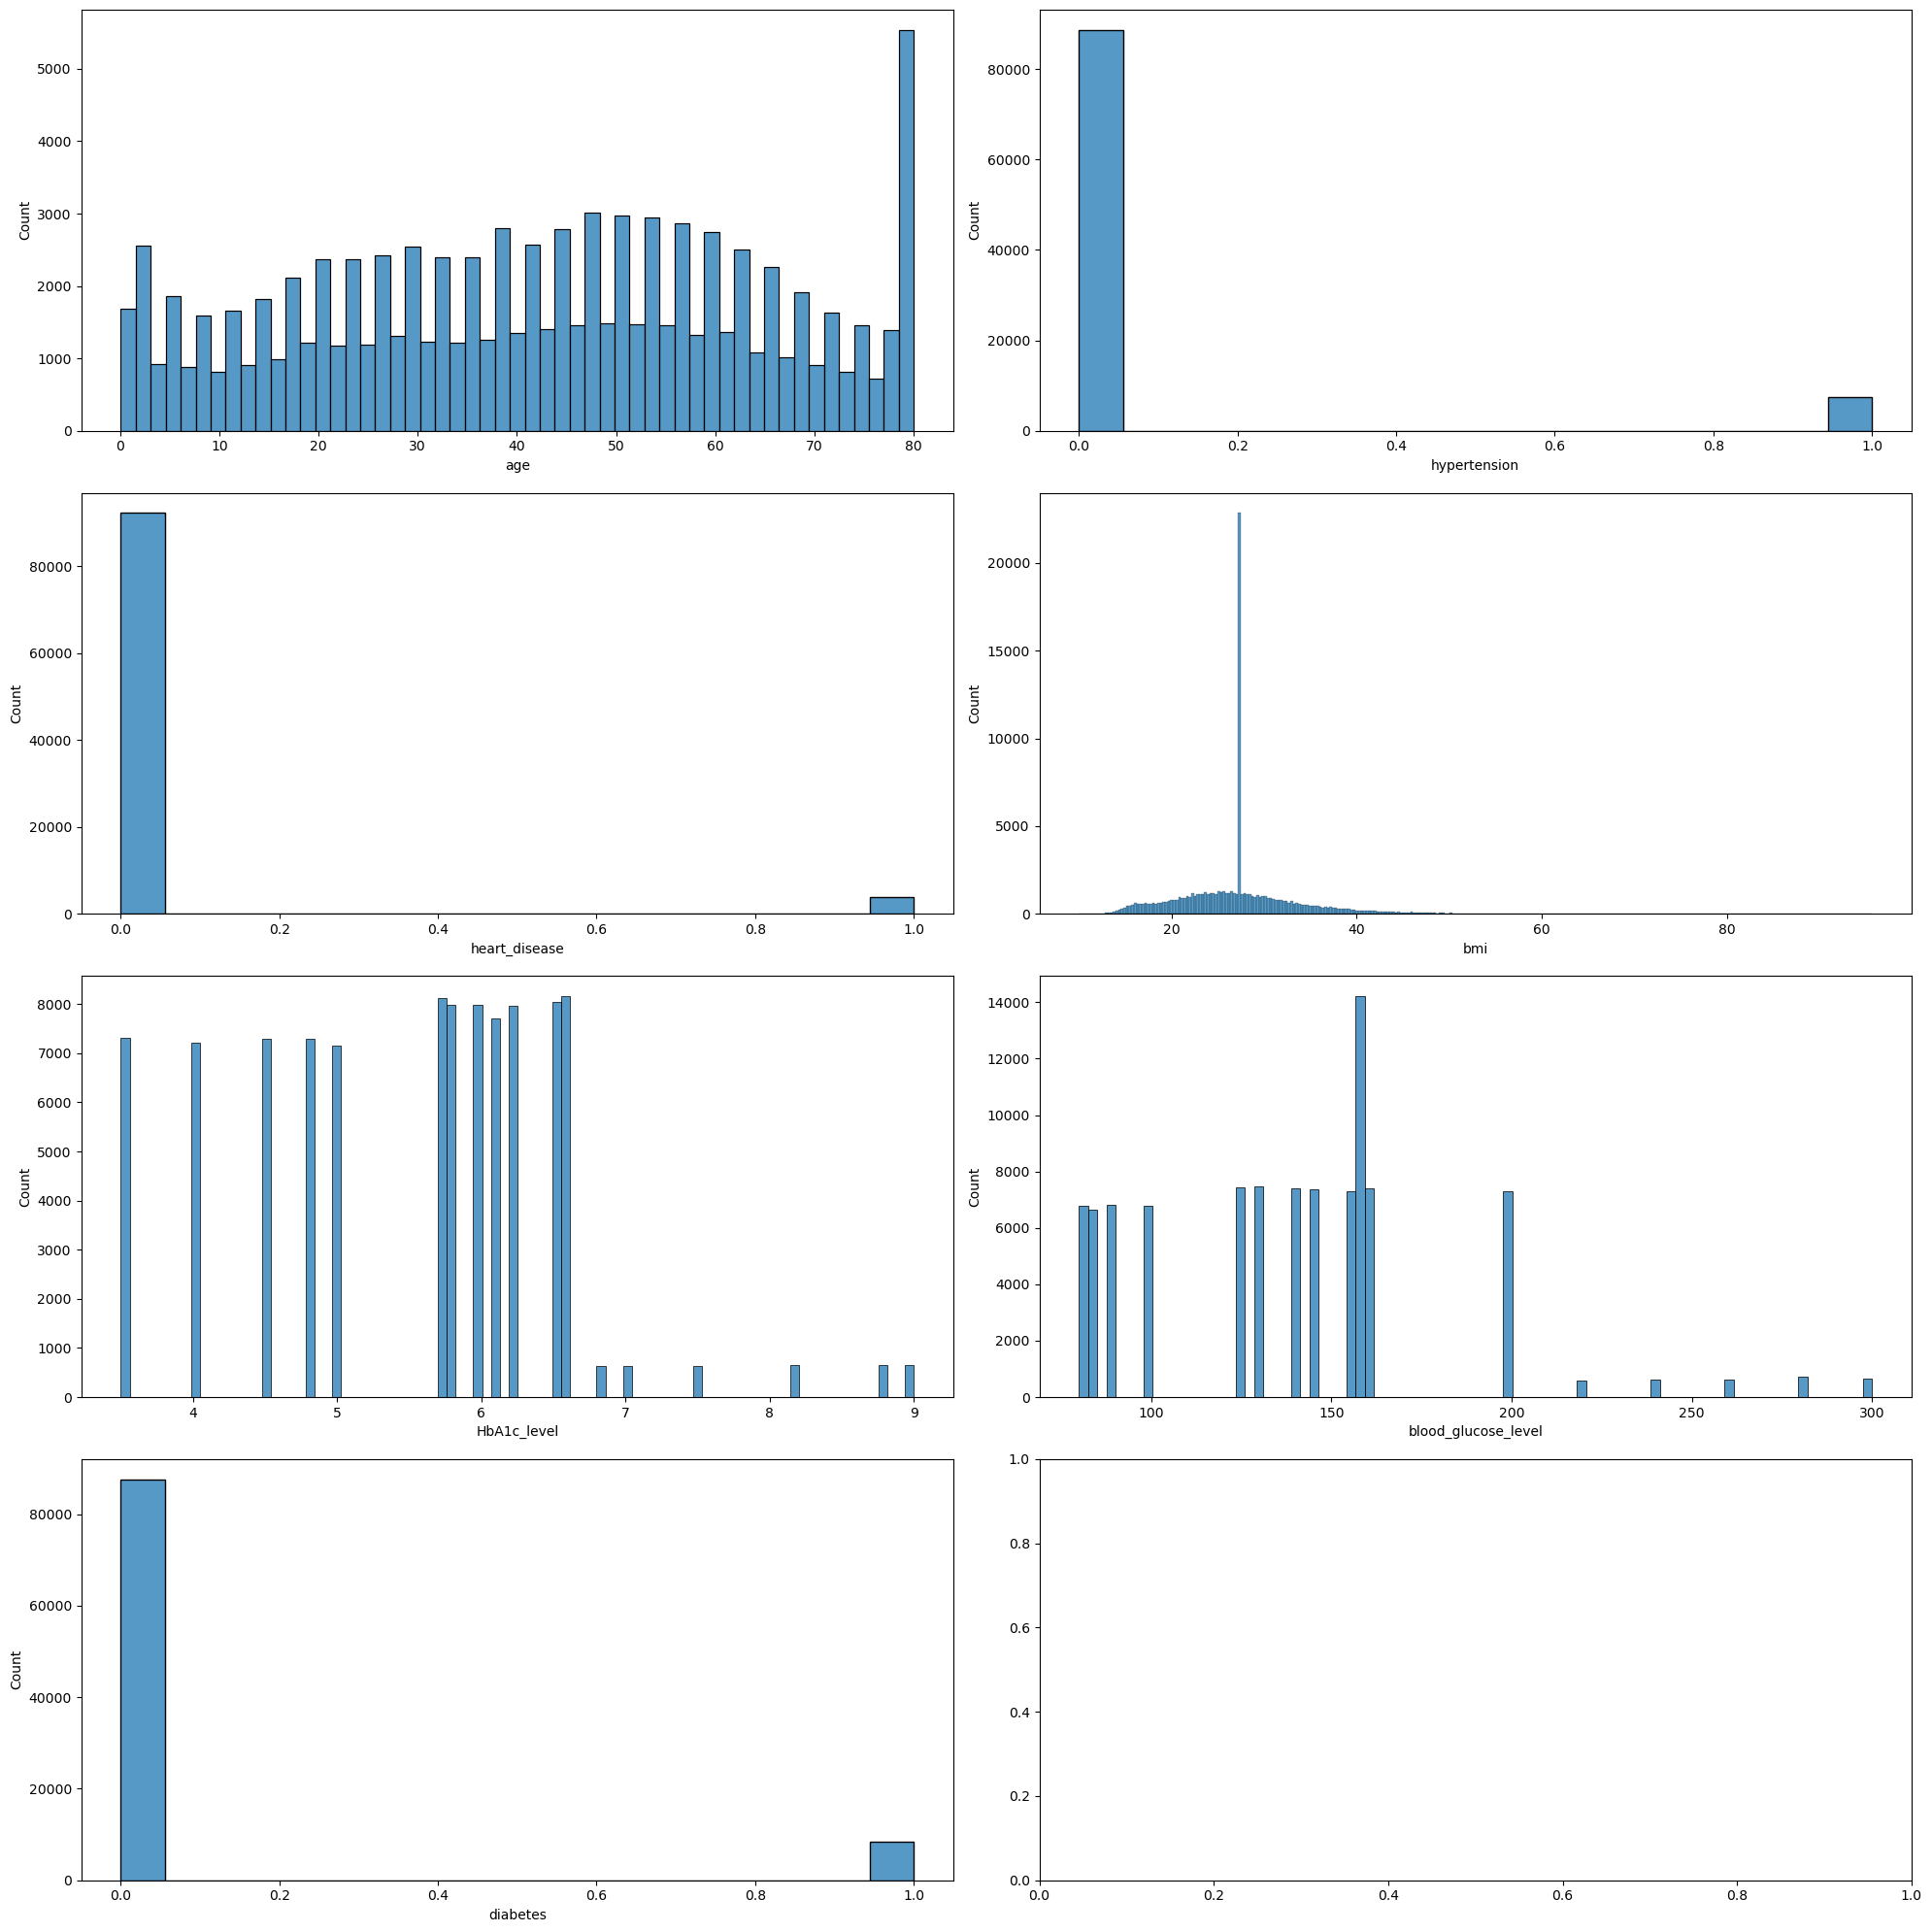

In [31]:
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.histplot(data[column_name], ax=position[index])

plt.tight_layout()
plt.show()

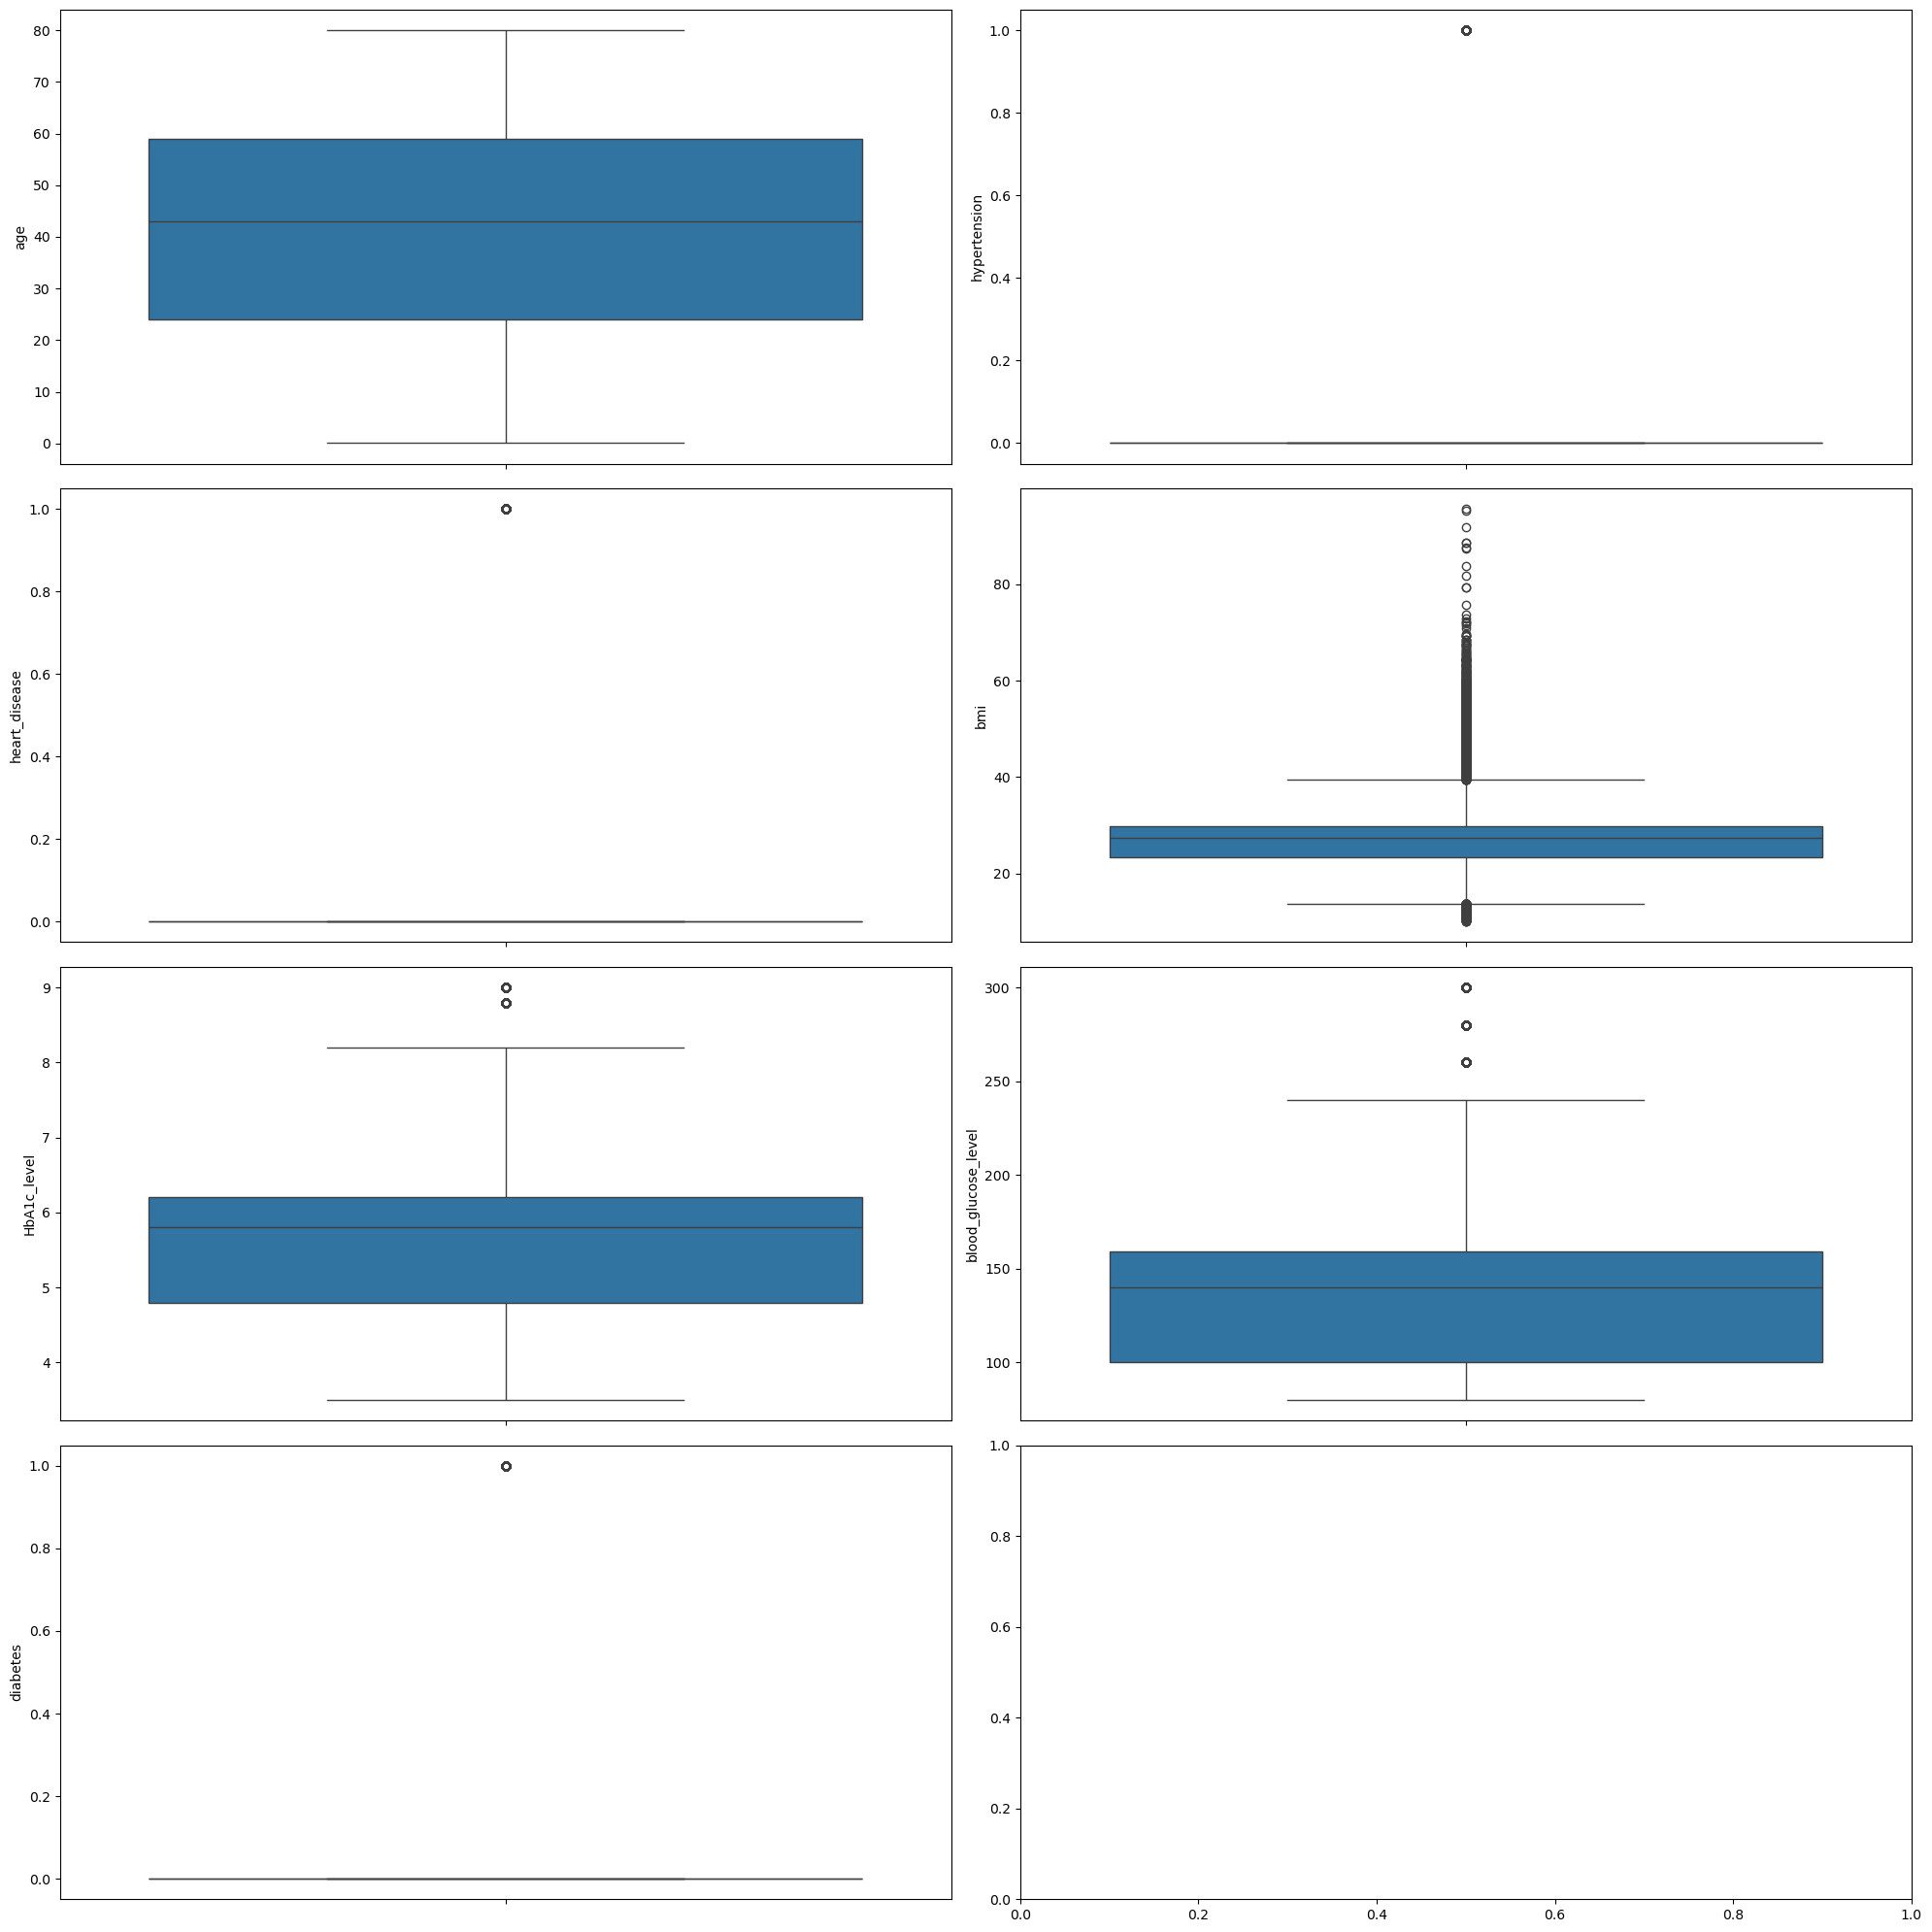

In [33]:
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.boxplot(data[column_name], ax=position[index])

plt.tight_layout()
plt.show()

<Axes: >

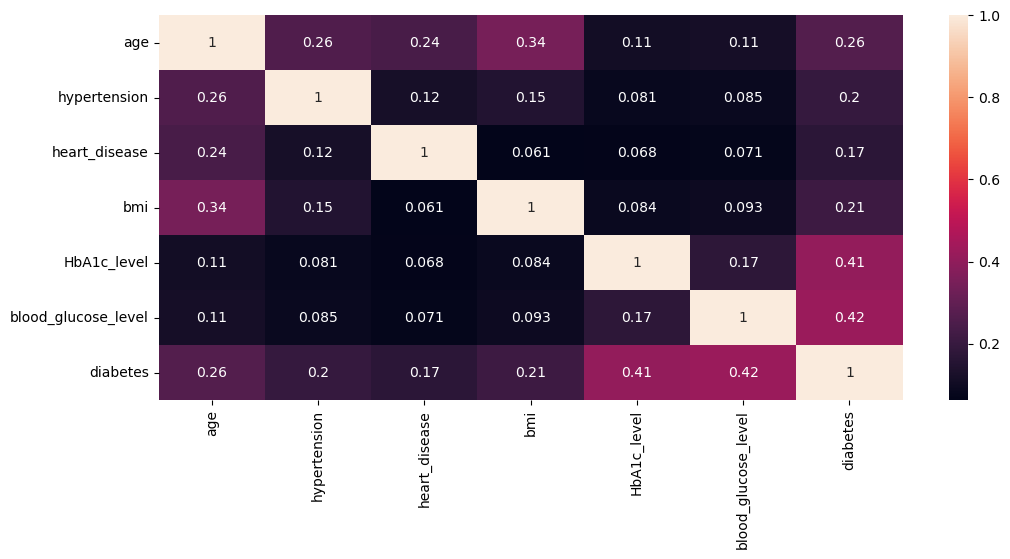

In [35]:
plt.figure(figsize=(12,5))
correlation_map = numerical_data.corr()
correlation_map 
sns.heatmap(correlation_map, annot=True)

#### Naration
The correlation heatmap above shows that there is a strong correlation between blood_glucose_level and diabetes and a lower correlation between heart disease and diabetes

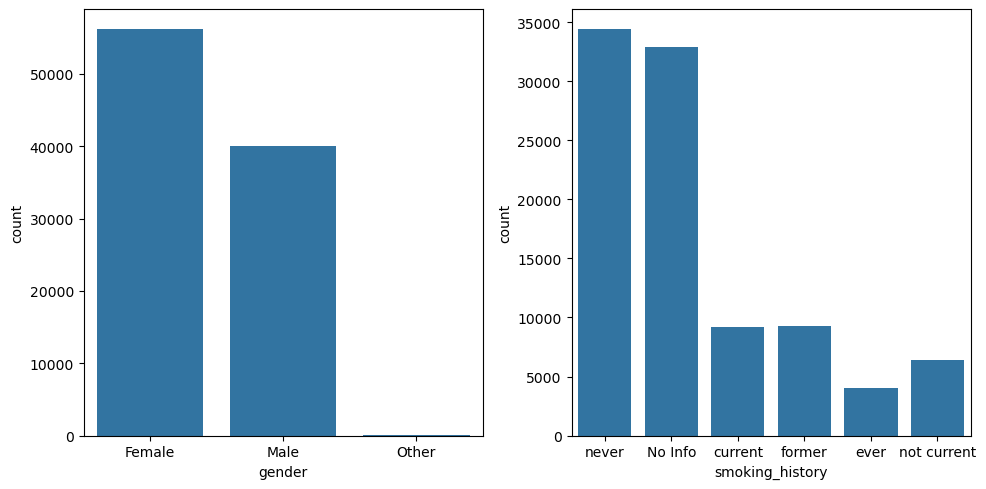

In [37]:
fig, position = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
position =position.flatten()

for index, column_name in enumerate(categorical_columns):
    sns.countplot(x=data[column_name], ax=position[index])
    
plt.tight_layout()
plt.show()

### Narration
The first chart above shows the distribution of gender, with a higher number of females than male.
The second chart shows the distribution of the patients smoking history, with a higher number of people who have never smoked and a lower number of people who do not smoke currently.

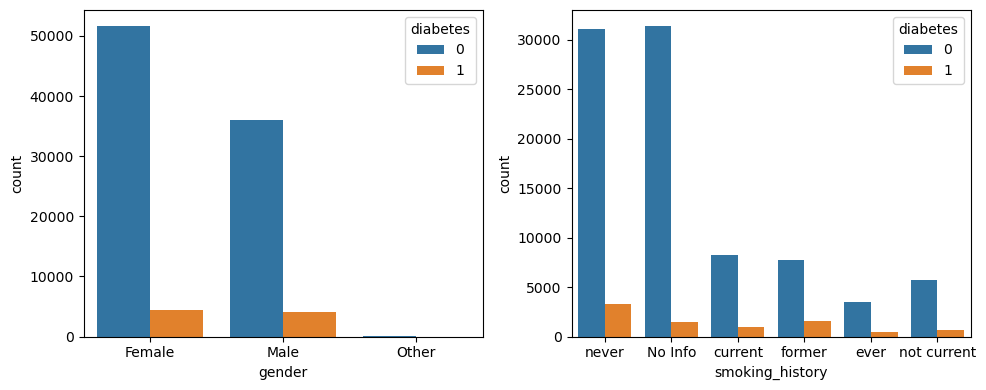

In [39]:
fig, position = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
position =position.flatten()

for index, column_name in enumerate(categorical_columns):
    sns.countplot(x=data[column_name], hue=data["diabetes"], ax=position[index])
    
plt.tight_layout()
plt.show()

#### Narration
The first chart shows that gender does not have much impact on the occurence of diabetes.
The second chart shows the relationship between patients' smoking history and the occurence of diabetes, revealing that smoking has minimal impact on the the occurence of diabetes. 

Text(0.5, 1.0, 'Total Number of Patients')

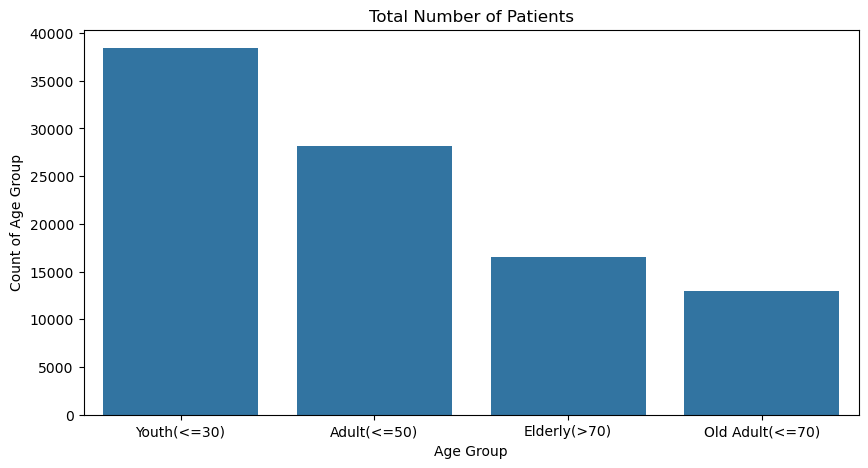

In [47]:
#data visualization
#Age bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=30)"
    elif age <= 55:
        return "Adult(<=50)"
    elif age <= 65:
        return "Old Adult(<=70)"
    else:
        return "Elderly(>70)"

data['age_bracket'] = data['age'].apply(age_bracket)

# Calculate the order based on descending counts
age_bracket_order = data['age_bracket'].value_counts().index

#Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='age_bracket', data=data, order=age_bracket_order)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

### Narration
The bar chart shows the number of patients in different age groups, with a higher population of youths and a lower population of Old Adults.

In [51]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>70)
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult(<=50)
2,Male,28.0,0,0,never,27.32,5.7,158,0,Youth(<=30)
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult(<=50)
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly(>70)


label
No     87664
Yes     8482
Name: count, dtype: int64
label
No     87664
Yes     8482
Name: count, dtype: int64


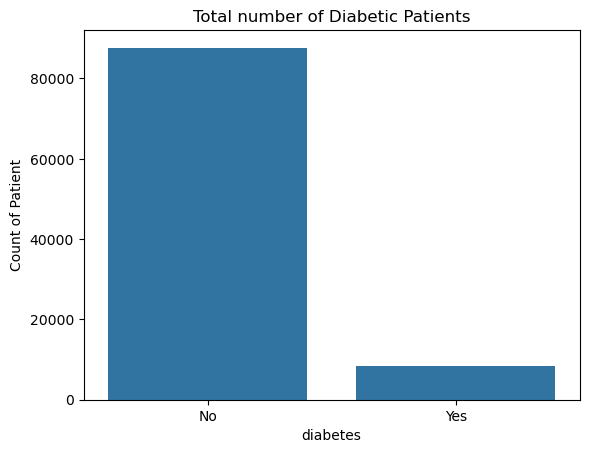

In [53]:
# target - have diabetes or not (1=yes, 0=no)
def label(tg):
    if tg ==1:
        return "Yes"
    else:
        return "No"

data['label'] = data['diabetes'].apply(label)
print (data["label"].value_counts())

#Total patient in each category
print(data["label"].value_counts())
sns.countplot(x='label', data=data)
plt.xlabel('diabetes')
plt.ylabel('Count of Patient')
plt.title('Total number of Diabetic Patients');

### Narration
The chart above shows the number of patients with diabetes and without diabetes. It shows a higher population of people without diabetes.

Text(0.5, 1.0, 'Total Number of Patients')

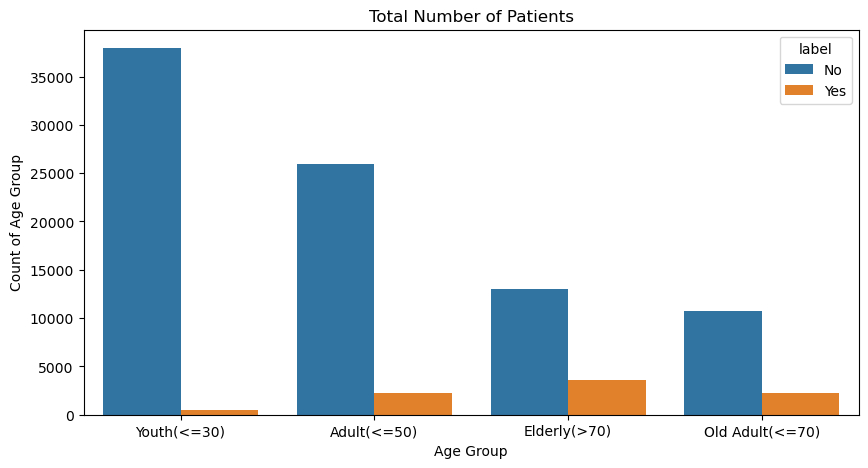

In [59]:
# Investigating the age group of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=data, order=age_bracket_order, hue='label')
age_bracket_order = data['age_bracket'].value_counts().index
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

### Narration
The chart above shows that patients older than 70 years are more likely to be diabetic than the youth and other age groups.

Text(0.5, 1.0, 'Total Number of Patients')

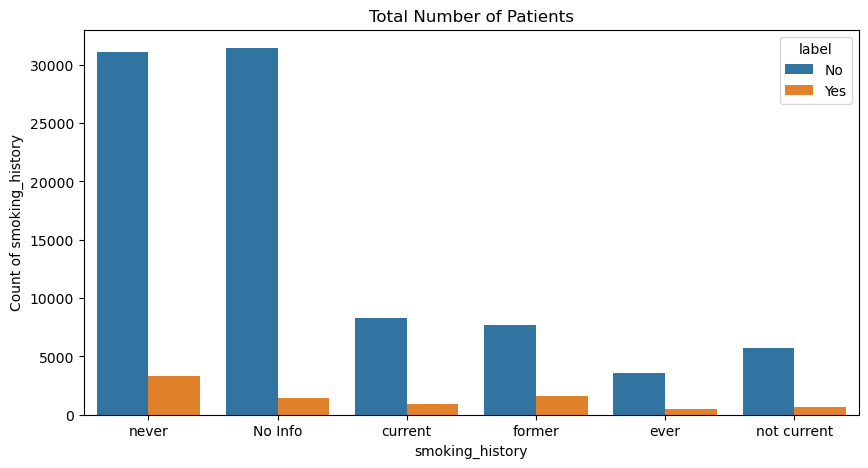

In [61]:
#Investigating the smoking history of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='smoking_history', data=data, hue='label')
plt.xlabel('smoking_history')
plt.ylabel('Count of smoking_history')
plt.title('Total Number of Patients')

### Narration
The chart above shows that patients who have never smoked before are have diabetes thatn those that have and currently do. 

Text(0.5, 1.0, 'Total Number of Patients')

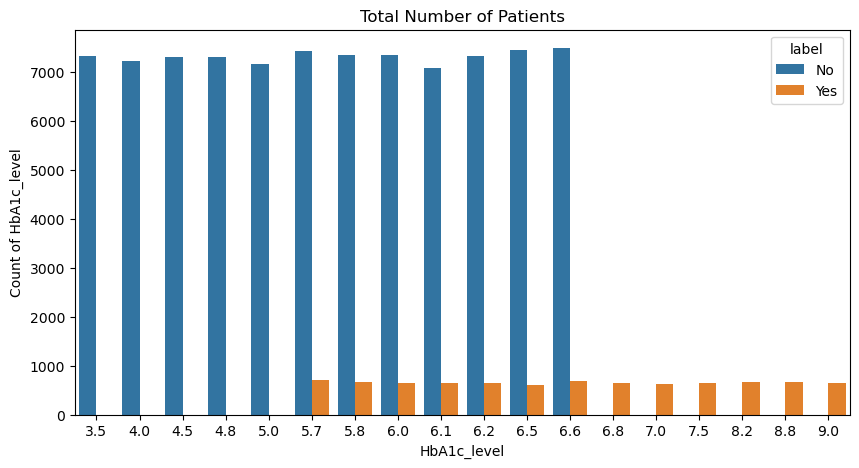

In [63]:
#Investigating HbA1c_level of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='HbA1c_level', data=data, hue='label')
plt.xlabel('HbA1c_level')
plt.ylabel('Count of HbA1c_level')
plt.title('Total Number of Patients')

### Narration
The bar chart above shows that the higher a patient's HbA1c_level the higher the chances of being diabetic and vice versa. It also shows that diabetes begins to occur and HbA1c level of 5.7

Text(0.5, 1.0, 'Total Number of Patients')

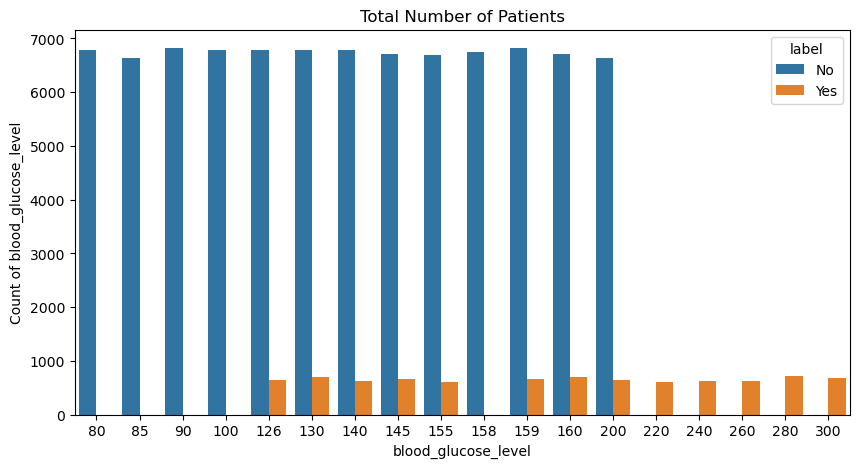

In [65]:
#Investigating blood_glucose_level of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='blood_glucose_level', data=data, hue='label')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count of blood_glucose_level')
plt.title('Total Number of Patients')

### Narration¶
The bar chart above shows that the higher a patient'sblood_glucosec_level the higher the chances of being diabetic and vice versa.

Text(0.5, 1.0, 'Total Number of Patients')

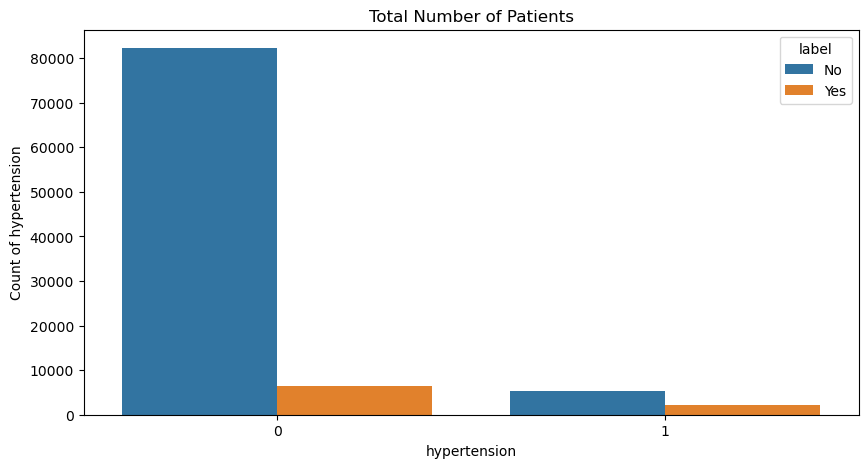

In [67]:
#Investigating hypertension of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='hypertension', data=data, hue='label')
plt.xlabel('hypertension')
plt.ylabel('Count of hypertension')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

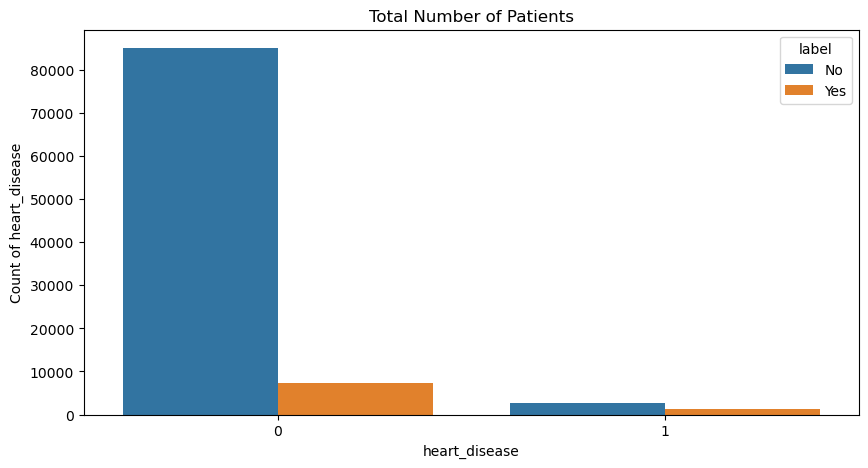

In [69]:
#Investigating heart_disease of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='heart_disease', data=data, hue='label')
plt.xlabel('heart_disease')
plt.ylabel('Count of heart_disease')
plt.title('Total Number of Patients')

### Data Preprocessing

In [72]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket,label
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>70),No
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult(<=50),No
2,Male,28.0,0,0,never,27.32,5.7,158,0,Youth(<=30),No
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult(<=50),No
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly(>70),No


In [89]:
#create a copy of the data (Exclude target/Label alongside other columns that was created)

data1 = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]

In [91]:
numerical_data = data1.select_dtypes(include="number")
numerical_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [95]:
numerical_columns = numerical_data.columns
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [99]:
categorical_data = data1.select_dtypes(include="object")
categorical_columns = categorical_data.columns
categorical_columns

Index(['gender', 'smoking_history'], dtype='object')

In [101]:
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [103]:
# Questions == features
# Answers ==== Label/target
label = data1["diabetes"]
features = data1.drop("diabetes", axis=1)

In [105]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


### Label Encoding

In [107]:
categorical_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [109]:
# Create an instance of the encoder
encoder = LabelEncoder()

In [111]:
for column_name in categorical_columns:
    features[column_name] = encoder.fit_transform(data[column_name])

In [113]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


### Data Splitting and Feature Scaling

In [116]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [118]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
46612,0,35.0,0,0,0,31.53,6.6,155
31612,0,0.4,0,0,0,15.19,4.0,130
96143,0,60.0,0,0,2,20.90,6.5,100
95691,1,66.0,0,0,4,27.05,6.0,130
37658,1,48.0,0,0,5,24.05,4.8,145


### Model Training

In [121]:
# Initialize the model
model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train, y_train)

C:\Users\ikeol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [123]:
# make predictions
predictions = model.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [125]:
y_test.values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Model Evaluation

              precision    recall  f1-score   support

           0    0.96093   0.98612   0.97336     17509
           1    0.80745   0.59210   0.68320      1721

    accuracy                        0.95086     19230
   macro avg    0.88419   0.78911   0.82828     19230
weighted avg    0.94719   0.95086   0.94740     19230



Text(0.5, 23.52222222222222, 'Actual Value')

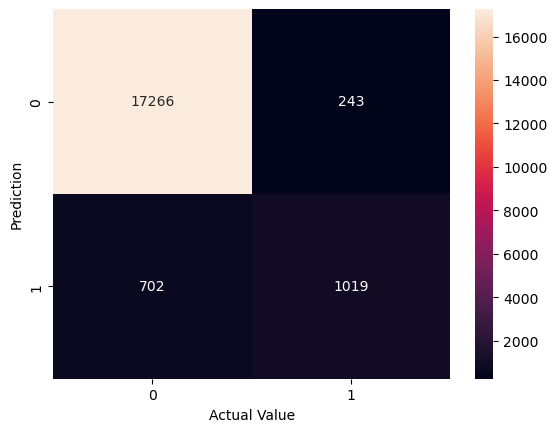

In [130]:
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)

sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

In [132]:
# Initialize the scaler
scaler = MinMaxScaler()

In [134]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0    0.96370   0.99006   0.97670     17509
           1    0.85990   0.62057   0.72089      1721

    accuracy                        0.95699     19230
   macro avg    0.91180   0.80532   0.84880     19230
weighted avg    0.95441   0.95699   0.95381     19230



Text(0.5, 23.52222222222222, 'Actual Value')

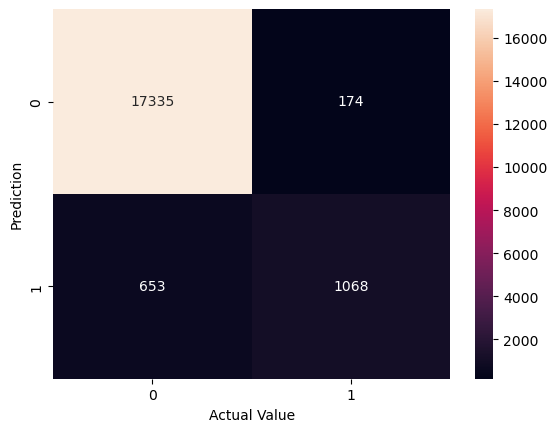

In [136]:
# Initialize the model

model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train_scaled, y_train)
# make predictions
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)

sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

              precision    recall  f1-score   support

           0    0.97698   0.95037   0.96349     17509
           1    0.60464   0.77223   0.67823      1721

    accuracy                        0.93443     19230
   macro avg    0.79081   0.86130   0.82086     19230
weighted avg    0.94366   0.93443   0.93796     19230



Text(0.5, 23.52222222222222, 'Actual Value')

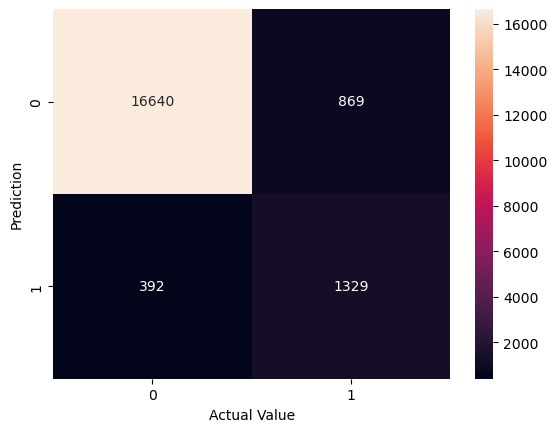

In [138]:
# Initialize the model
model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})
# Train the model
model.fit(X_train_scaled, y_train)
# make predictions
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)

sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     17509
           1       0.60      0.77      0.68      1721

    accuracy                           0.93     19230
   macro avg       0.79      0.86      0.82     19230
weighted avg       0.94      0.93      0.94     19230



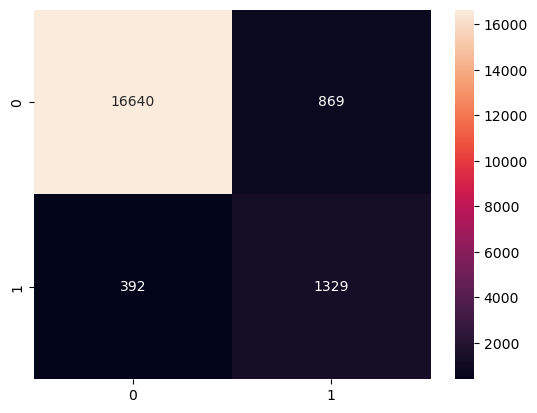

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     17509
           1       0.65      0.75      0.70      1721

    accuracy                           0.94     19230
   macro avg       0.81      0.85      0.83     19230
weighted avg       0.95      0.94      0.94     19230



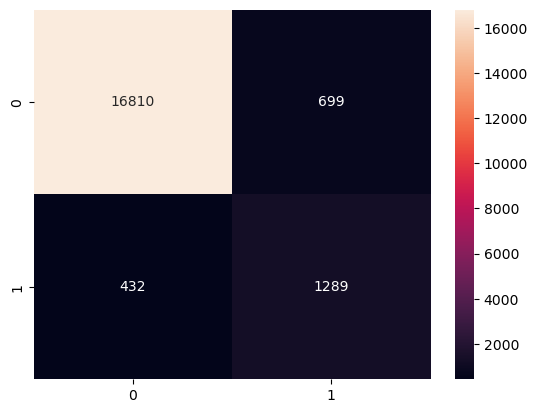

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.71      0.74      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



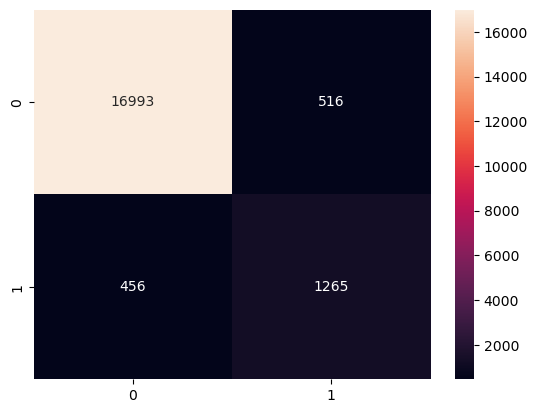

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



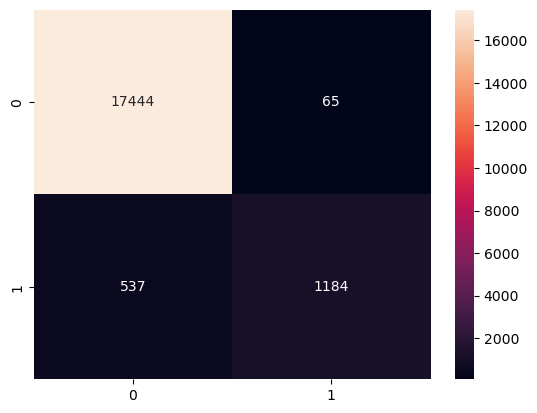

In [140]:
class_weights = {0:1, 1:4}

#Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
              [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
              [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
              [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()

### Feature Importance and Feature Selection

In [143]:
classifiers[2] [0].feature_importances_

array([0.01006657, 0.09230329, 0.00605621, 0.00478599, 0.02820926,
       0.11034655, 0.45945358, 0.28877854])

In [145]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
46612,0,35.0,0,0,0,31.53,6.6,155
31612,0,0.4,0,0,0,15.19,4.0,130
96143,0,60.0,0,0,2,20.90,6.5,100
95691,1,66.0,0,0,4,27.05,6.0,130
37658,1,48.0,0,0,5,24.05,4.8,145


In [147]:
# Feature importance using Random Forest
importances = classifiers[2][0].feature_importances_
importances

array([0.01006657, 0.09230329, 0.00605621, 0.00478599, 0.02820926,
       0.11034655, 0.45945358, 0.28877854])

In [149]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,gender,0.010067
1,age,0.092303
2,hypertension,0.006056
3,heart_disease,0.004786
4,smoking_history,0.028209
5,bmi,0.110347
6,HbA1c_level,0.459454
7,blood_glucose_level,0.288779


In [151]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,HbA1c_level,0.459454
7,blood_glucose_level,0.288779
5,bmi,0.110347
1,age,0.092303
4,smoking_history,0.028209
0,gender,0.010067
2,hypertension,0.006056
3,heart_disease,0.004786


<Axes: xlabel='Importance', ylabel='Feature'>

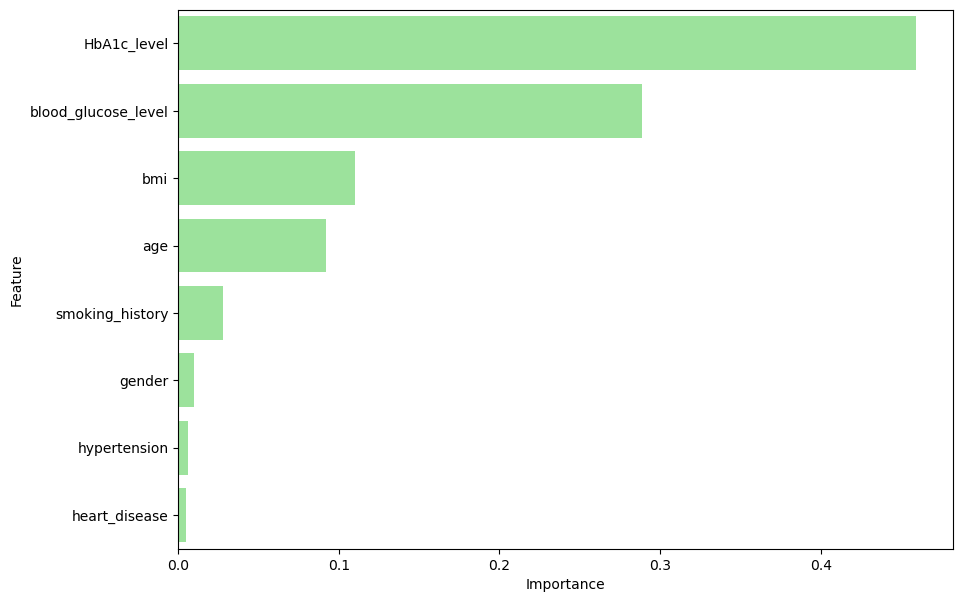

In [153]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='lightgreen')